# Downloading the Animal Images Dataset
[https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset](https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset)

## Prerequisite
1. An authentication token from Kaggle. Follow the Kaggle API documentation to get started [Kaggle API] (https://github.com/Kaggle/kaggle-api)

In [1]:
# Enter the local environment and download the dataset and unzip
# <KAGGLE_USERNAME> - Replace it with your Kaggle username
# <KAGGLE_KEY> - Replace it with your Kaggle token
!export KAGGLE_USERNAME=<KAGGLE_USERNAME> && export KAGGLE_KEY=<KAGGLE_KEY> && kaggle datasets download antoreepjana/animals-detection-images-dataset --unzip

100% 8.92G/8.92G [01:00<00:00, 119MB/s] 
100% 8.92G/8.92G [01:00<00:00, 157MB/s]


In [2]:
import os

import tensorflow as tf
import pandas as pd


## List of directories

In [3]:
# Path to test directory
test_data_dir = "test"
# Path to train directory
train_data_dir = "train"

## Compare training and test data

<Axes: >

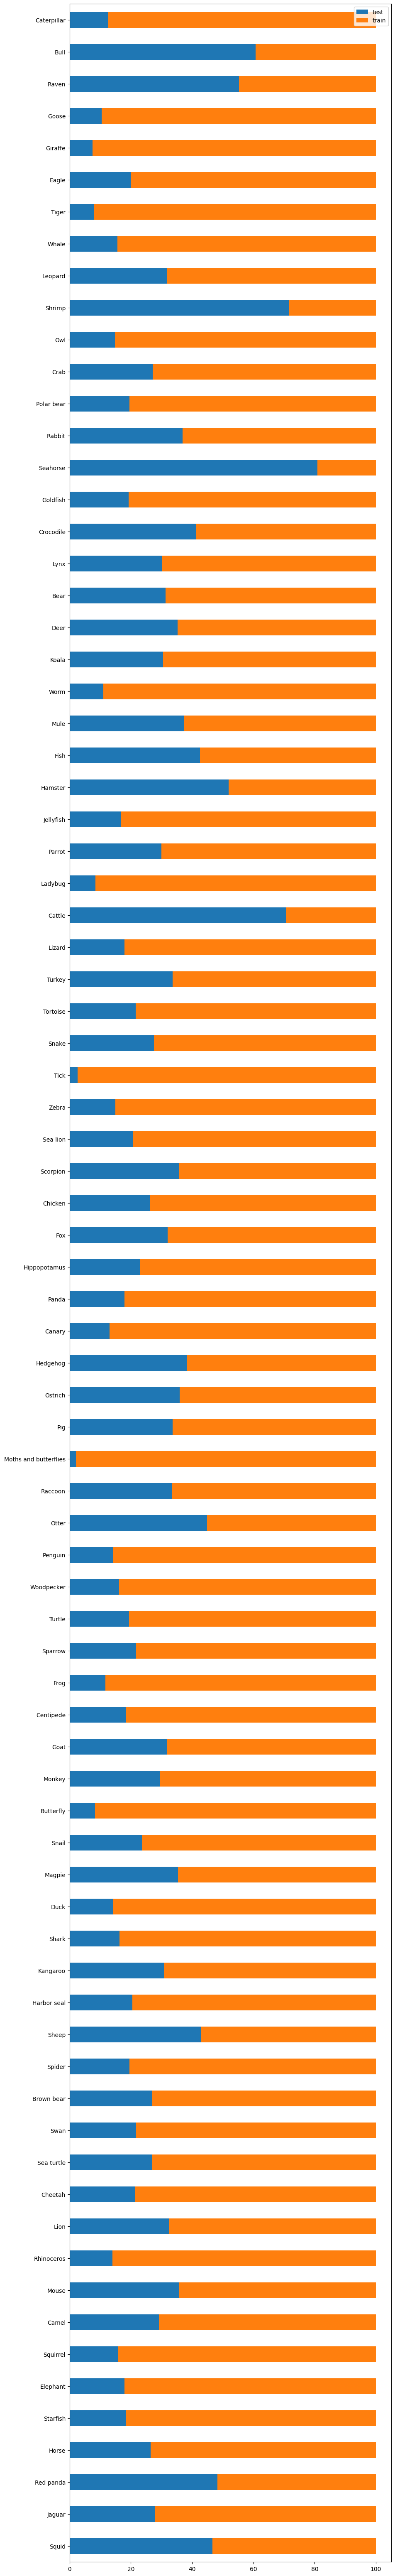

In [4]:
# Access all animal class names present for training and testing
class_names = os.listdir(train_data_dir)

animal_values = []
test_values = []
train_values = []

for name in class_names:
    test_subdirectory_path = os.path.join(test_data_dir, name)
    train_subdirectory_path = os.path.join(train_data_dir, name)
    test_image_count, train_image_count = len(os.listdir(test_subdirectory_path)), len(
        os.listdir(train_subdirectory_path)
    )
    total_image_count = train_image_count + test_image_count
    test_percent = round((test_image_count / total_image_count) * 100, 2)
    train_percent = round((train_image_count / total_image_count) * 100, 2)

    # Update the lists with appropriate values
    animal_values.append(name)
    test_values.append(test_percent)
    train_values.append(train_percent)

# Create a Pandas Dataframe
df = pd.DataFrame({"test": test_values, "train": train_values}, index=animal_values)

# Plot the data
df.plot(
    kind="barh",
    stacked=True,
    figsize=(
        10,
        80,
    ),
)

## Load data

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.1, rotation_range=0.1, horizontal_flip=True
)
test_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

train_datagen = train_image_data_generator.flow_from_directory(
    train_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height), seed=123
)

test_datagen = test_image_data_generator.flow_from_directory(
    test_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height), seed=123
)

Found 22566 images belonging to 80 classes.
Found 6505 images belonging to 80 classes.


## Creating and compiling the model

In [6]:
animals_number = len(class_names)

# Create the model
model = tf.keras.Sequential(
      [
        tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same", input_shape=(img_width, img_height, 3)),
        tf.keras.layers.MaxPooling2D(),
        
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        
        tf.keras.layers.Dropout(0.2),
          
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(animals_number, name="outputs", activation="softmax"),
    ]
)

adam = tf.keras.optimizers.Adam()

model.compile(
    optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

# View model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

## Fit the model

In [7]:
epochs = 12

# Fit the model
history = model.fit(
    train_datagen,
    steps_per_epoch=(train_datagen.samples // batch_size),
    epochs=epochs,
    validation_data=test_datagen,
    validation_steps=(test_datagen.samples // batch_size)
)

Epoch 1/12


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


705/705 [==============================] - 690s 963ms/step - loss: 3.7643 - accuracy: 0.1254 - val_loss: 3.9249 - val_accuracy: 0.1156
Epoch 2/12
705/705 [==============================] - 674s 957ms/step - loss: 3.4483 - accuracy: 0.1753 - val_loss: 3.7681 - val_accuracy: 0.1362
Epoch 3/12
705/705 [==============================] - 659s 934ms/step - loss: 3.2369 - accuracy: 0.2083 - val_loss: 3.6144 - val_accuracy: 0.1599
Epoch 4/12
705/705 [==============================] - 679s 964ms/step - loss: 3.0594 - accuracy: 0.2382 - val_loss: 3.5217 - val_accuracy: 0.1837
Epoch 5/12
705/705 [==============================] - 697s 989ms/step - loss: 2.9129 - accuracy: 0.2637 - val_loss: 3.5296 - val_accuracy: 0.1820
Epoch 6/12
705/705 [==============================] - 651s 924ms/step - loss: 2.7675 - accuracy: 0.2925 - val_loss: 3.2825 - val_accuracy: 0.2057
Epoch 7/12
705/705 [==============================] - 676s 959ms/step - loss: 2.6201 - accuracy: 0.3209 - val_loss: 3.4267 - val_accura

## Visualize the training results

In [9]:
# Visualize the training results
epochs_range = range(epochs)

training_acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

# Create a pd Dataframe for accuracy
acc_df = pd.DataFrame({"Training Accuracy": training_acc, "Validation Accuracy": validation_acc}, index=epochs_range)
# Create a pd Dataframe for loss
loss_df = pd.DataFrame({"Training Loss": training_loss, "Validation Loss": validation_loss}, index=epochs_range)

<Axes: >

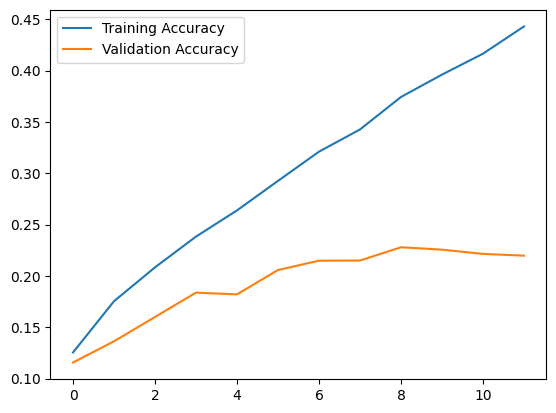

In [10]:
# Plot Accuracy
acc_df.plot()

<Axes: >

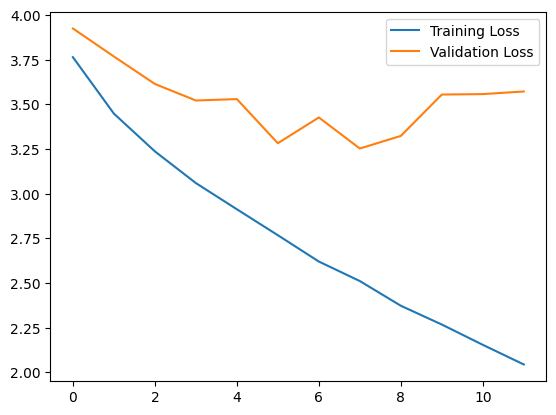

In [11]:
# Plot Loss
loss_df.plot()

## Save the model

In [12]:
# Save the entire model (architecture, weights, and optimizer state) 
model.save("animal_detection_model")
# Save only the weights of the model
model.save_weights("animal_detection_model_weights.h5")

In [13]:
!zip -r animal_dection_model.zip animal_detection_model

  adding: animal_detection_model/ (stored 0%)
  adding: animal_detection_model/variables/ (stored 0%)
  adding: animal_detection_model/variables/variables.index (deflated 63%)
  adding: animal_detection_model/variables/variables.data-00000-of-00001 (deflated 21%)
  adding: animal_detection_model/assets/ (stored 0%)
  adding: animal_detection_model/saved_model.pb (deflated 88%)
  adding: animal_detection_model/keras_metadata.pb (deflated 91%)
  adding: animal_detection_model/fingerprint.pb (stored 0%)
